# Clustering with scikit-learn
    
##    Algorithm : hierarchical-agglomerative clustering

This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.


In [43]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib notebook

In [2]:
# initialize logger
import logging
logging.basicConfig(level = logging.INFO,
                    format = '%(asctime)s - %(levelname)s - %(message)s')

#### Load Data

In [3]:
# Read Dataset from file
dataset = pd.read_csv('Mall_Customers.csv')
logging.info('Dataset Shape : ' + str(dataset.shape) )

2019-01-13 00:57:08,511 - INFO - Dataset Shape : (200, 5)


In [4]:
dataset.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
areMissingValuesPresent = dataset.isnull().values.any()
if areMissingValuesPresent:
    logging.warning('Missing Values Present in dataset ')

In [6]:
logging.info('Coloumns : \n' + str(dataset.columns) )

2019-01-13 00:58:13,548 - INFO - Coloumns : 
Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


#### Data Analysis

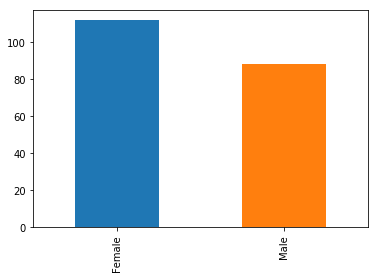

In [7]:
dataset['Genre'].value_counts().sort_index().plot.bar()

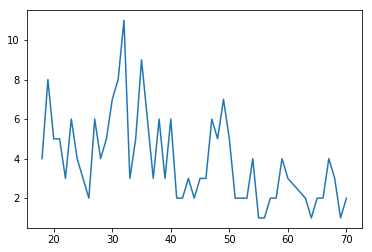

In [8]:
dataset['Age'].value_counts().sort_index().plot.line()

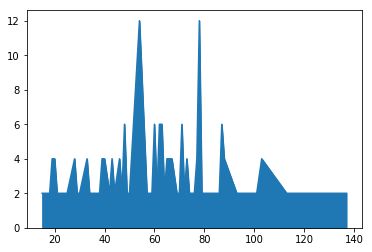

In [9]:
dataset['Annual Income (k$)'].value_counts().sort_index().plot.area()

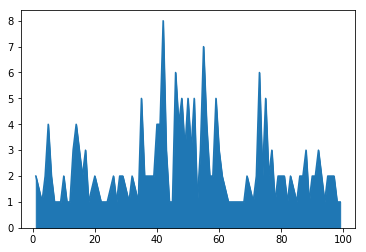

In [10]:
dataset['Spending Score (1-100)'].value_counts().sort_index().plot.area()

In [11]:
dataset['Spending Score (1-100)'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

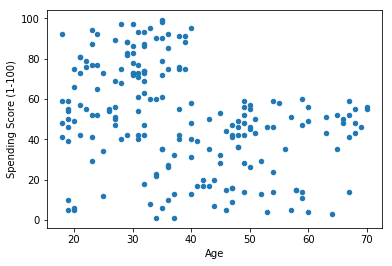

In [12]:
dataset.plot.scatter(x='Age', y='Spending Score (1-100)')

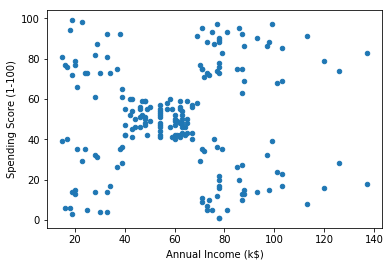

In [13]:
dataset.plot.scatter(x='Annual Income (k$)', y='Spending Score (1-100)')

#### Choosing features for clustering

In [14]:
X = dataset.iloc[:, [3,4]].values
logging.info('X Shape : ' + str(X.shape) )

2019-01-13 00:58:41,656 - INFO - X Shape : (200, 2)


## Using DendoGram to find Optimal number of cluster

In [26]:
import  scipy.cluster.hierarchy as sch

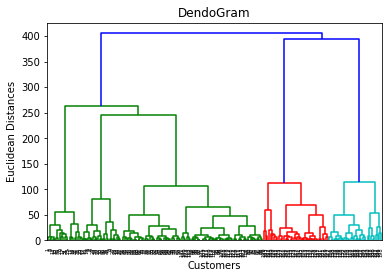

In [30]:
dendogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('DendoGram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

#### At around 150-200 if we create a line , we get 5 optimal clusters 

### Fitting Hierarchical clustering to our dataset

In [31]:
from sklearn.cluster import AgglomerativeClustering

In [32]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [36]:
assignments = pd.DataFrame({'CutomerID':dataset['CustomerID'],'cluster':y_hc})
assignments.head(5)

,CutomerID,cluster
0,1,4
1,2,3
2,3,4
3,4,3
4,5,4


## Visualizing Clusters

<IPython.core.display.Javascript object>


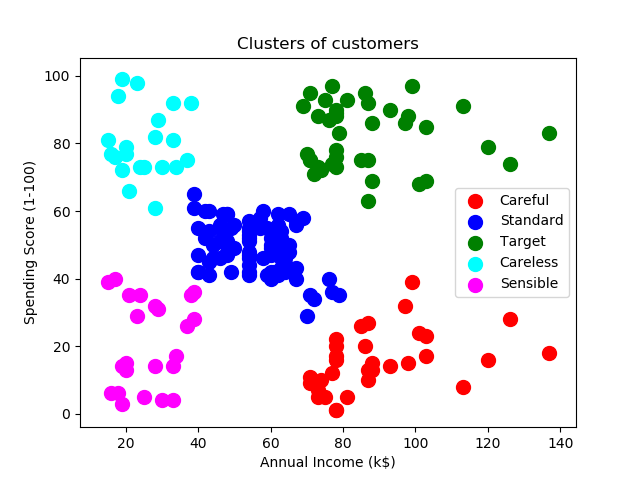

In [47]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()